In [185]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

In [186]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten

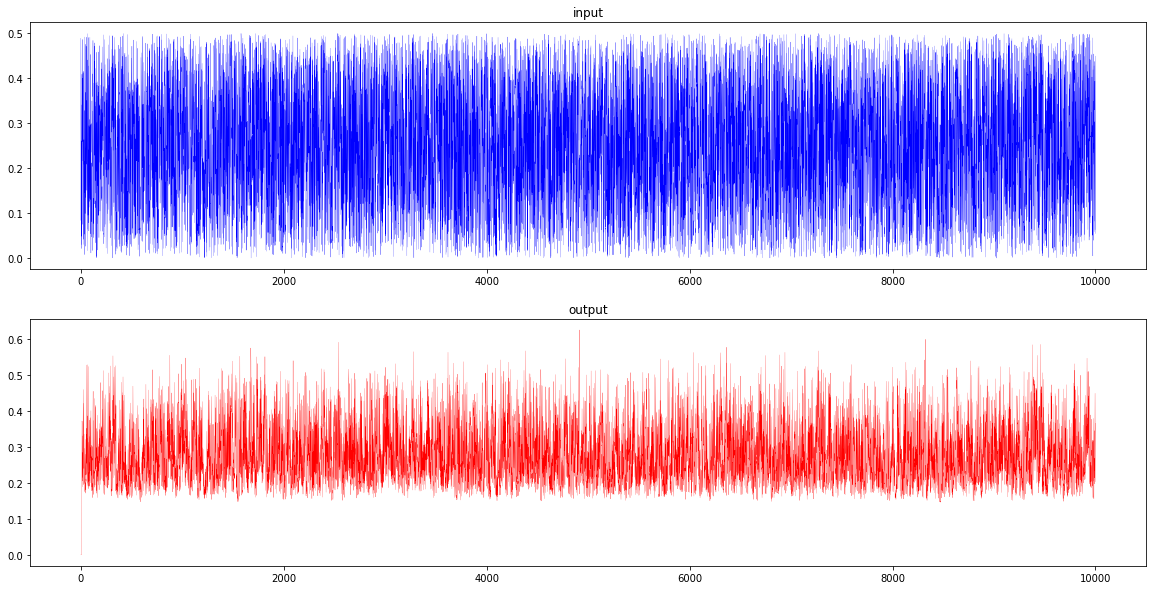

In [187]:
x, y = np.loadtxt("data.txt", delimiter=",")
t=np.arange(start=0,stop=len(x), step=1)

plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
plt.title('input')
plt.plot(t,x, color = 'b', linewidth= 0.2)
plt.subplot(2,1,2)
plt.title('output')
plt.plot(t,y, color = 'r', linewidth = 0.2)

x_train = x[:4000]
x_valid = x[4000:5000] #validation
x_test = x[5000:]

y_train = y[:4000]
y_valid = y[4000:5000]
y_test = y[5000:]

## TDNN

In [188]:
# Create a TDNN model
def create_model(input_shape):
    model = Sequential()
    model.add(Dense(units=20,input_shape=input_shape, activation='tanh'))
    #model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        #activation=activation[0]))
    model.add(Dense(units=30, activation='tanh'))
    model.add(Dense(units=1, activation='tanh'))
    learning_rate = 0.02
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [189]:
# Prepare the input X and target Y
def get_XY(x, y, time_steps):
    # Prepare Y
    Y = y[time_steps:]
    # Prepare X
    X = []
    rows_x = len(Y)
    j = 0
    for i in range(rows_x):
        X = np.append(X,x[j:j+time_steps])
        j = j + 1

    #X = np.reshape(X, (rows_x, time_steps))
    X =  np.reshape(X, (rows_x,1, time_steps)) 
    return X, Y 

 
time_steps = 10

trainX, trainY = get_XY(x_train, y_train, time_steps)
testX, testY = get_XY(x_test, y_test, time_steps)
validX, validY = get_XY(x_valid, y_valid, time_steps)

window = 10
input_shape = ( 1, window)

model = create_model(input_shape)
print(len(trainX))

model.summary()

3990
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 1, 20)             220       
                                                                 
 dense_73 (Dense)            (None, 1, 30)             630       
                                                                 
 dense_74 (Dense)            (None, 1, 1)              31        
                                                                 
Total params: 881
Trainable params: 881
Non-trainable params: 0
_________________________________________________________________


In [190]:
print(trainX)

[[[0.08396357 0.48934032 0.35634724 ... 0.02121557 0.03572273 0.26082492]]

 [[0.48934032 0.35634724 0.25023581 ... 0.03572273 0.26082492 0.04836501]]

 [[0.35634724 0.25023581 0.23554419 ... 0.26082492 0.04836501 0.40907428]]

 ...

 [[0.2872668  0.45796251 0.2477162  ... 0.0337384  0.03448892 0.08339229]]

 [[0.45796251 0.2477162  0.08300619 ... 0.03448892 0.08339229 0.47371913]]

 [[0.2477162  0.08300619 0.16299883 ... 0.08339229 0.47371913 0.40554421]]]


In [191]:
print(trainX.shape)
trainX
print(trainY.shape)
trainY
print(len(trainX))


(3990, 1, 10)
(3990,)
3990


In [192]:
'''
X = np.reshape(x, (len(x),1))
Y = np.reshape(y, (len(y),1))

X_train = np.reshape(x_train, (len(x_train),1))
Y_train = np.reshape(y_train, (len(y_train),1))

X_valid = np.reshape(x_valid, (len(x_valid),1))
Y_valid = np.reshape(y_valid, (len(y_valid),1))

print(X_train.shape)
print(Y_train.shape)

print(X_valid.shape)
print(Y_valid.shape)

window = 10
input_shape = (window,1)

model = create_model(input_shape)


model.summary()
'''


'\nX = np.reshape(x, (len(x),1))\nY = np.reshape(y, (len(y),1))\n\nX_train = np.reshape(x_train, (len(x_train),1))\nY_train = np.reshape(y_train, (len(y_train),1))\n\nX_valid = np.reshape(x_valid, (len(x_valid),1))\nY_valid = np.reshape(y_valid, (len(y_valid),1))\n\nprint(X_train.shape)\nprint(Y_train.shape)\n\nprint(X_valid.shape)\nprint(Y_valid.shape)\n\nwindow = 10\ninput_shape = (window,1)\n\nmodel = create_model(input_shape)\n\n\nmodel.summary()\n'

In [193]:
history = model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2, validation_data = (validX, validY)).history

Epoch 1/10
3990/3990 - 6s - loss: 0.0025 - val_loss: 0.0015 - 6s/epoch - 1ms/step
Epoch 2/10
3990/3990 - 5s - loss: 0.0013 - val_loss: 0.0011 - 5s/epoch - 1ms/step
Epoch 3/10
3990/3990 - 5s - loss: 0.0010 - val_loss: 0.0010 - 5s/epoch - 1ms/step
Epoch 4/10
3990/3990 - 5s - loss: 9.1820e-04 - val_loss: 7.7855e-04 - 5s/epoch - 1ms/step
Epoch 5/10
3990/3990 - 6s - loss: 8.1855e-04 - val_loss: 9.4277e-04 - 6s/epoch - 1ms/step
Epoch 6/10
3990/3990 - 6s - loss: 6.6238e-04 - val_loss: 5.7012e-04 - 6s/epoch - 1ms/step
Epoch 7/10
3990/3990 - 5s - loss: 5.9263e-04 - val_loss: 5.2582e-04 - 5s/epoch - 1ms/step
Epoch 8/10
3990/3990 - 5s - loss: 5.7052e-04 - val_loss: 5.3170e-04 - 5s/epoch - 1ms/step
Epoch 9/10
3990/3990 - 5s - loss: 5.4367e-04 - val_loss: 7.3296e-04 - 5s/epoch - 1ms/step
Epoch 10/10
3990/3990 - 5s - loss: 5.4476e-04 - val_loss: 4.5809e-04 - 5s/epoch - 1ms/step


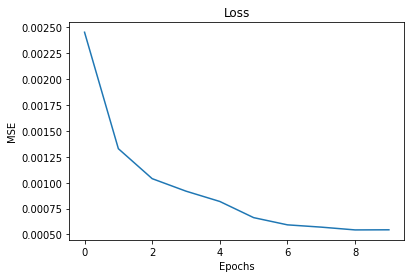

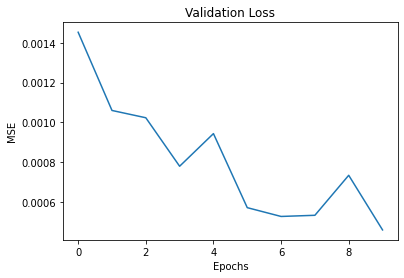

In [194]:
plt.plot(history['loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')


plt.show()

plt.plot(history['val_loss'])
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')


plt.show()

31/31 [==============================] - 0s 1ms/step - loss: 0.0135


0.013452938757836819

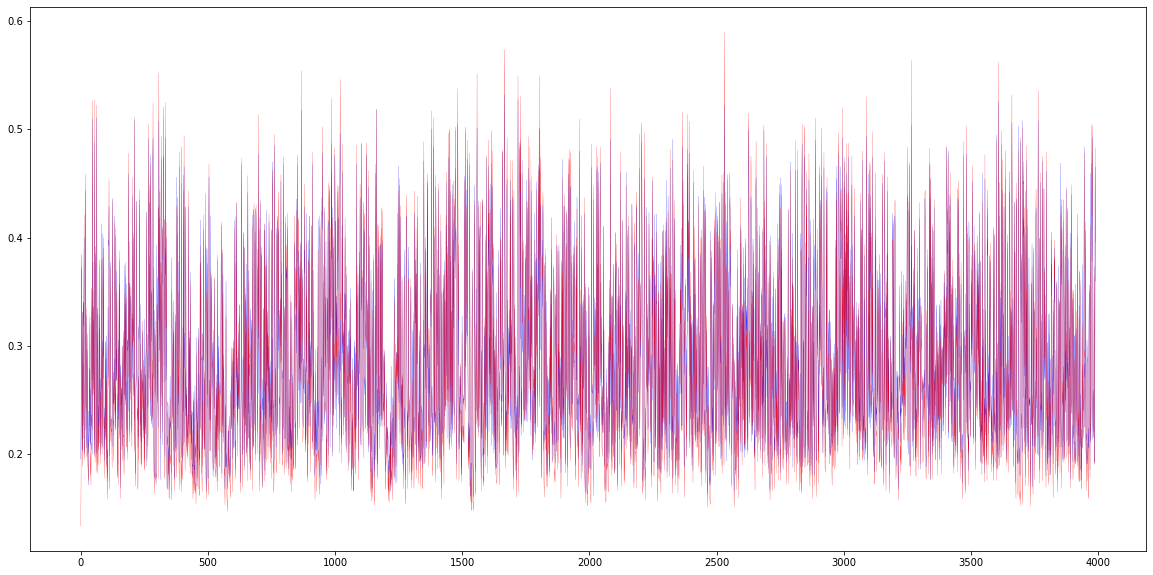

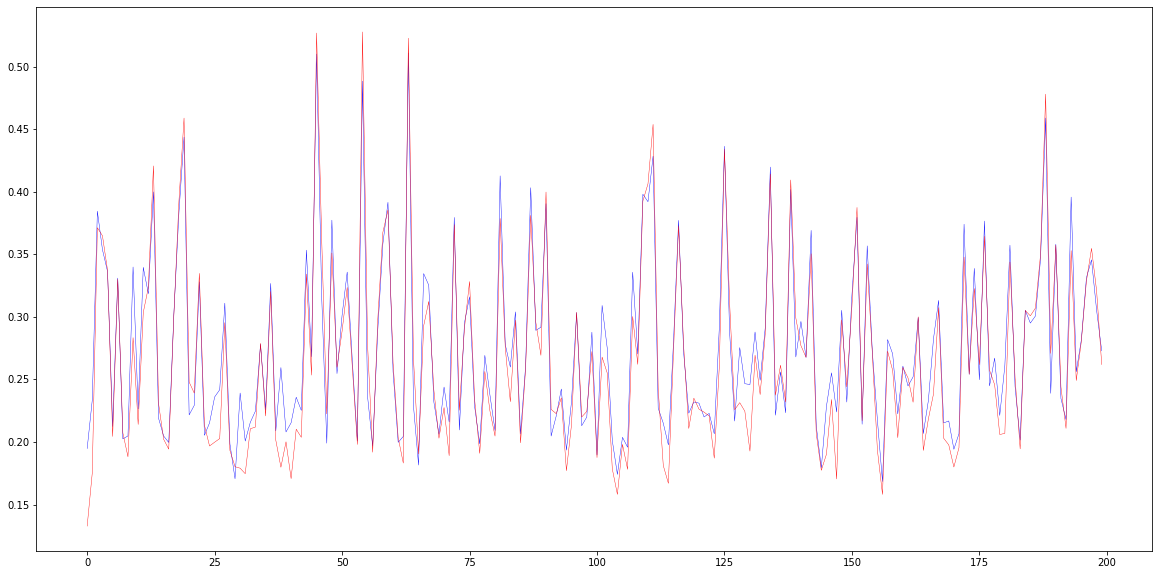

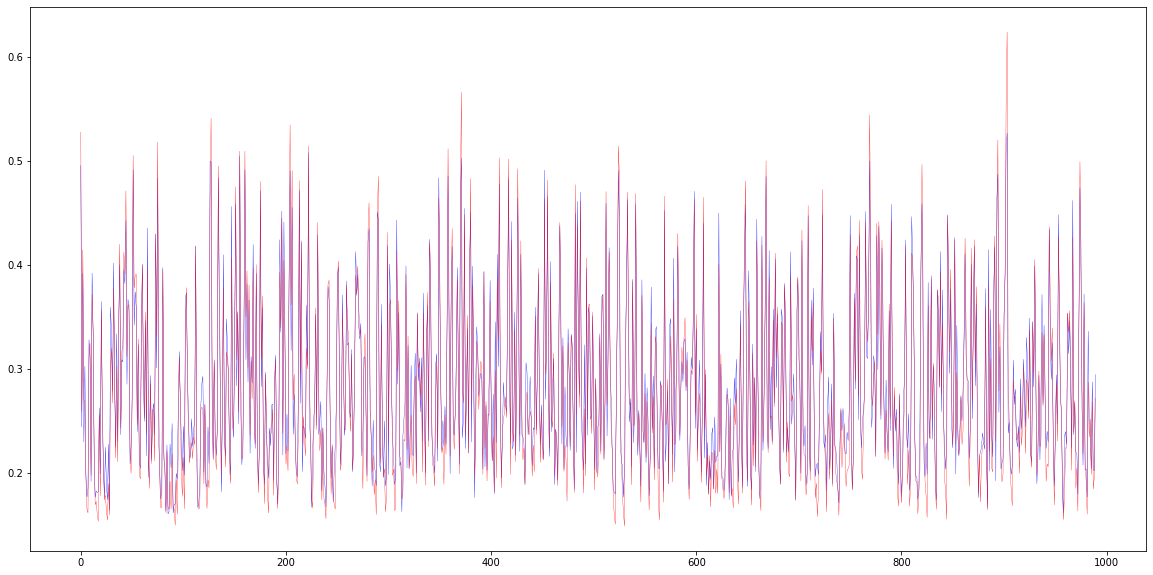

In [195]:
y = model.predict(trainX)
t=np.arange(start=0,stop=len(y), step=1)
plt.figure(figsize = (20,10))
plt.plot(t,y.ravel(), color = 'b', linewidth= 0.2)
plt.plot(t,trainY.ravel(), color = 'r', linewidth= 0.2)
model.evaluate(trainX, trainY)

plt.figure(figsize = (20,10))
plt.plot(t[:200],y.ravel()[:200], color = 'b', linewidth= 0.4)
plt.plot(t[:200],trainY.ravel()[:200], color = 'r', linewidth= 0.4)

y = model.predict(validX)
t=np.arange(start=0,stop=len(y), step=1)
plt.figure(figsize = (20,10))
plt.plot(t,y.ravel(), color = 'b', linewidth= 0.3)
plt.plot(t,validY.ravel(), color = 'r', linewidth= 0.3)
model.evaluate(validX, validY)


156/156 [==============================] - 0s 1ms/step - loss: 0.0125


0.012474075891077518

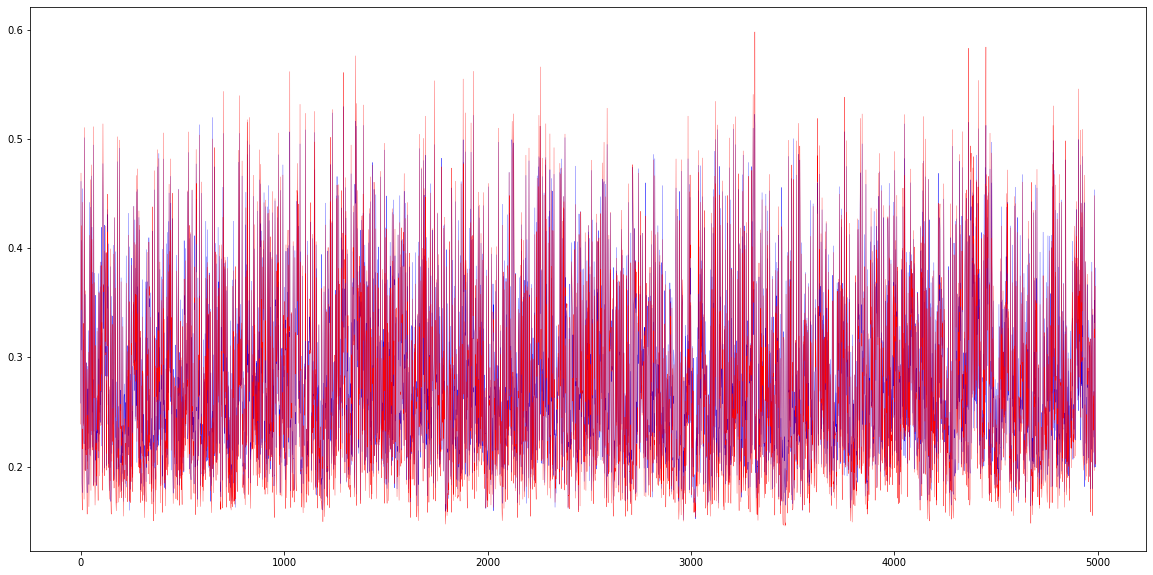

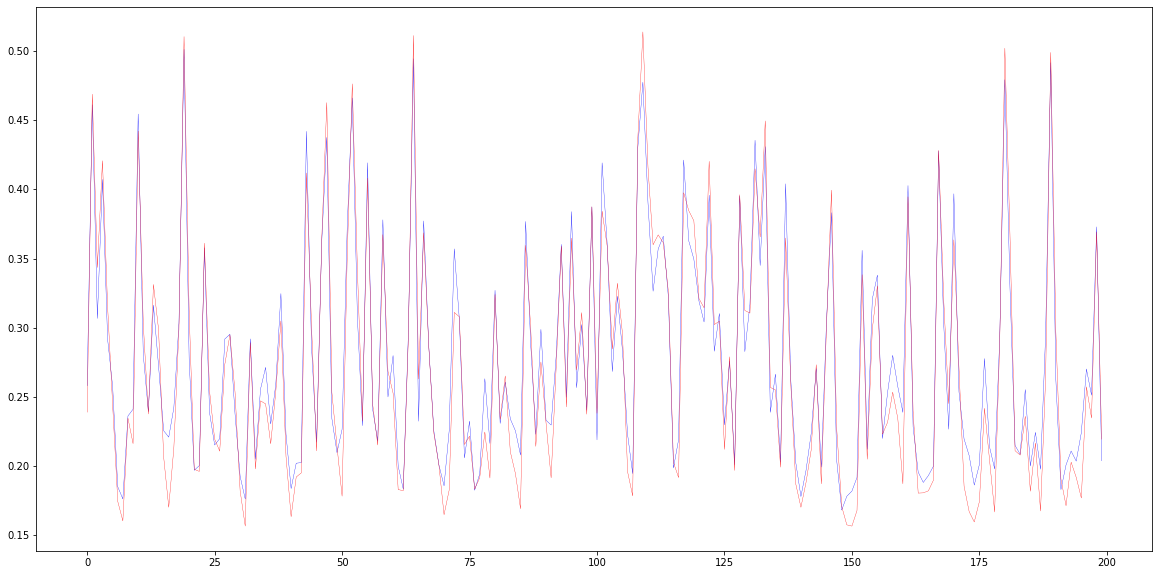

In [203]:
y = model.predict(testX)
t=np.arange(start=0,stop=len(y), step=1)
plt.figure(figsize = (20,10))
plt.plot(t,y.ravel(), color = 'b', linewidth= 0.3)
plt.plot(t,testY.ravel(), color = 'r', linewidth= 0.3)

plt.figure(figsize = (20,10))
plt.plot(t[:200],y.ravel()[:200], color = 'b', linewidth= 0.3)
plt.plot(t[:200],testY.ravel()[:200], color = 'r', linewidth= 0.3)

model.evaluate(testX, testY)